## Here we will be using aggregation functionalities with GROUP BY or PIVOT TABLE, and will do some data analysis of a dataset of Audi cars. 

Importing Libraries 

In [86]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid") # to improve visualization

Reading CSV File

In [87]:
df = pd.read_csv("audi.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


Finding the top 5 sold car models, their average reselling price and total sale price by using GROUP BY

In [88]:
#creating a new aggregate dataframe for model based on price where the columns will be count, mean and sum 
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

# sorting the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27


Finding the top 5 sold car models, their average reselling price and total sale  price by using PIVOT TABLE

In [89]:
#creating a pivot table in the basis of price to find information about models 
df_pivot_model = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])

#we can see a multilevel column name which has an unnecessary part named price, so dropping it 
df_pivot_model.columns=df_pivot_model.columns.droplevel(1)

# sorting the dataframe based on the column 'count'
df_pivot_model =df_pivot_model.sort_values(by=('count'), ascending=False)

# create a new column percentage of the cars in each model
df_pivot_model['percent_of_cars'] = (df_pivot_model['count']/df_pivot_model['count'].sum())*100

# convert the 'sum' column in millions
df_pivot_model['sum'] = df_pivot_model['sum']/1000000

# keep up to two decimal points
df_pivot_model = df_pivot_model.round(2)

# remove the 'count' column
df_pivot_model =df_pivot_model.drop('count', axis=1)
display(df_pivot_model.head(10))

,mean,sum,percent_of_cars
model,,,
A3,17408.52,33.58,18.08
Q3,22999.26,32.59,13.28
A4,20255.45,27.97,12.95
A1,14327.75,19.30,12.63
A5,23577.11,20.80,8.27
Q5,30445.69,26.70,8.22
Q2,22516.98,18.51,7.71
A6,22695.39,16.98,7.01
Q7,44788.32,17.78,3.72


### So, we can see that it is possible to do this task both by GROUP BY and PIVOT TABLE. I will be using group by here.

### Now we will make barplots to represent the above data visually

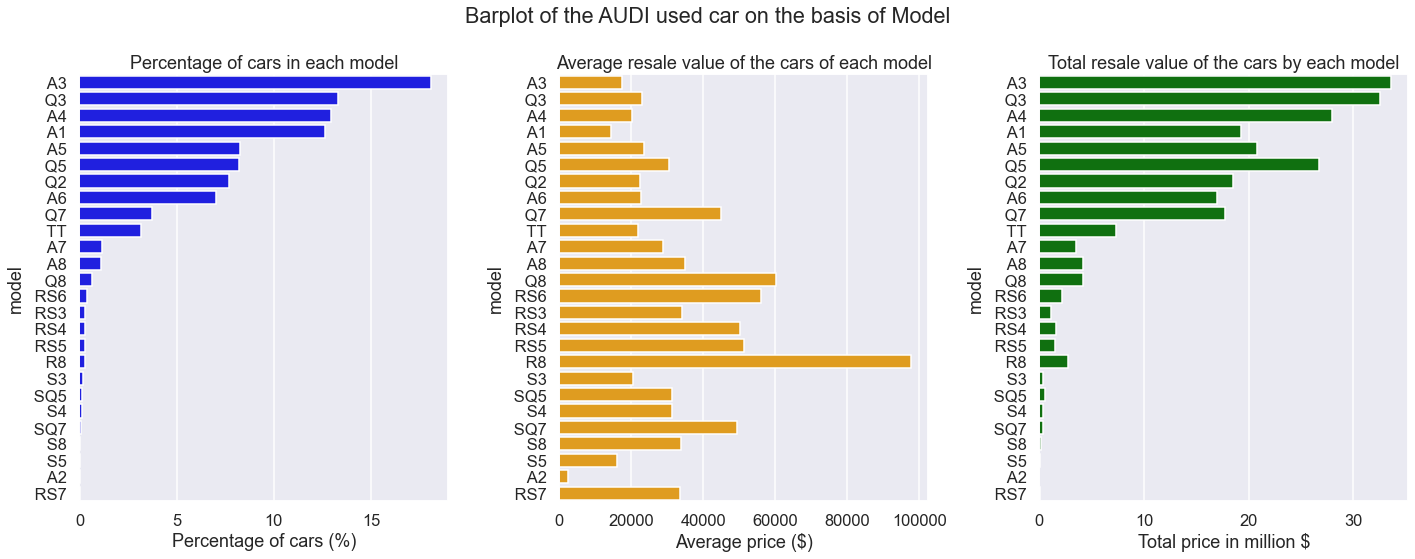

In [90]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")


plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")


plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")


plt.suptitle("Barplot of the AUDI used car on the basis of Model")
plt.tight_layout()
plt.show()

#### We can see the top sold models are A3(18.08%), Q3(13.23%), A4(12.95%), A1(12.63%) and A5 (8.27% ), besides we can see according to average reselling price the top 5 models are R8, Q8, RS6,SQ7 and Q7. And on the basis of total sale price top 5 models are, A3, Q3, A4, Q5 A5. 

Finding the transmission types based on most sold, their average reselling price and total sale 

In [91]:
df_agg_transmission = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

df_agg_transmission = df_agg_transmission.sort_values(by='count', ascending=False)

df_agg_transmission['percent_of_cars'] = (df_agg_transmission['count']/df_agg_transmission['count'].sum())*100

df_agg_transmission['sum'] = df_agg_transmission['sum']/1000000

df_agg_transmission = df_agg_transmission.round(2)

df_agg_transmission = df_agg_transmission.drop('count', axis=1)

display(df_agg_transmission.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,16101.03,70.35,40.95
Semi-Auto,27161.78,97.54,33.66
Automatic,28204.75,76.38,25.38


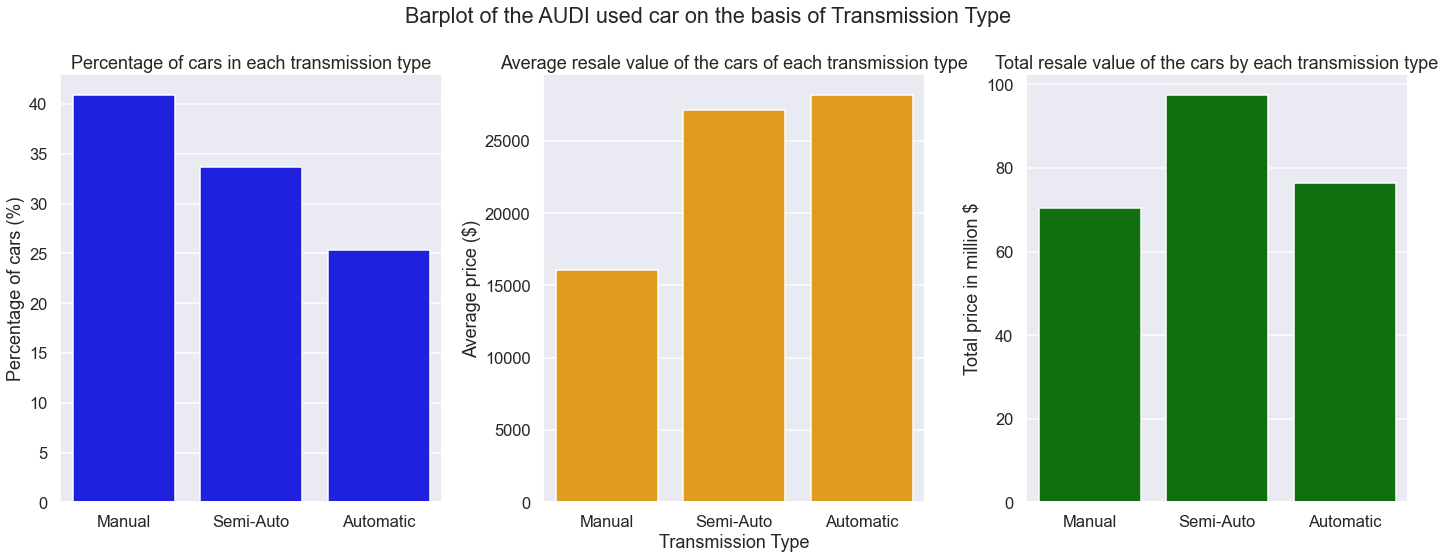

In [92]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x=df_agg_transmission.index, y='percent_of_cars', data=df_agg_transmission,color='blue')
plt.title("Percentage of cars in each transmission type")
plt.ylabel("Percentage of cars (%)")
plt.xlabel("")


plt.subplot(1, 3, 2)
sns.barplot(x=df_agg_transmission.index, y='mean', data=df_agg_transmission, color='orange')
plt.title("Average resale value of the cars of each transmission type")
plt.ylabel("Average price ($)")
plt.xlabel("Transmission Type")


plt.subplot(1, 3, 3)
sns.barplot(x=df_agg_transmission.index, y='sum', data=df_agg_transmission, color='green')
plt.title("Total resale value of the cars by each transmission type")
plt.ylabel("Total price in million $")
plt.xlabel("")


plt.suptitle("Barplot of the AUDI used car on the basis of Transmission Type")
plt.tight_layout()
plt.show()

#### We can see that Manual cars are most sold(41%), then Semi-auto and laslty automatic , besides we can see the average reselling price of automatic cars is the highest. And total sale price of the semi automatic cars is greater than the the other two.

Finding the fuel types based on most sold, their average reselling price and total sale 

In [93]:
df_agg_fuelType = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

df_agg_fuelType = df_agg_fuelType.sort_values(by='count', ascending=False)

df_agg_fuelType['percent_of_cars'] = (df_agg_fuelType['count']/df_agg_fuelType['count'].sum())*100

df_agg_fuelType['sum'] = df_agg_fuelType['sum']/1000000

df_agg_fuelType = df_agg_fuelType.round(2)

df_agg_fuelType = df_agg_fuelType.drop('count', axis=1)

display(df_agg_fuelType.head())

,mean,sum,percent_of_cars
fuelType,,,
Diesel,23237.52,129.60,52.28
Petrol,22480.91,113.82,47.46
Hybrid,30191.75,0.85,0.26


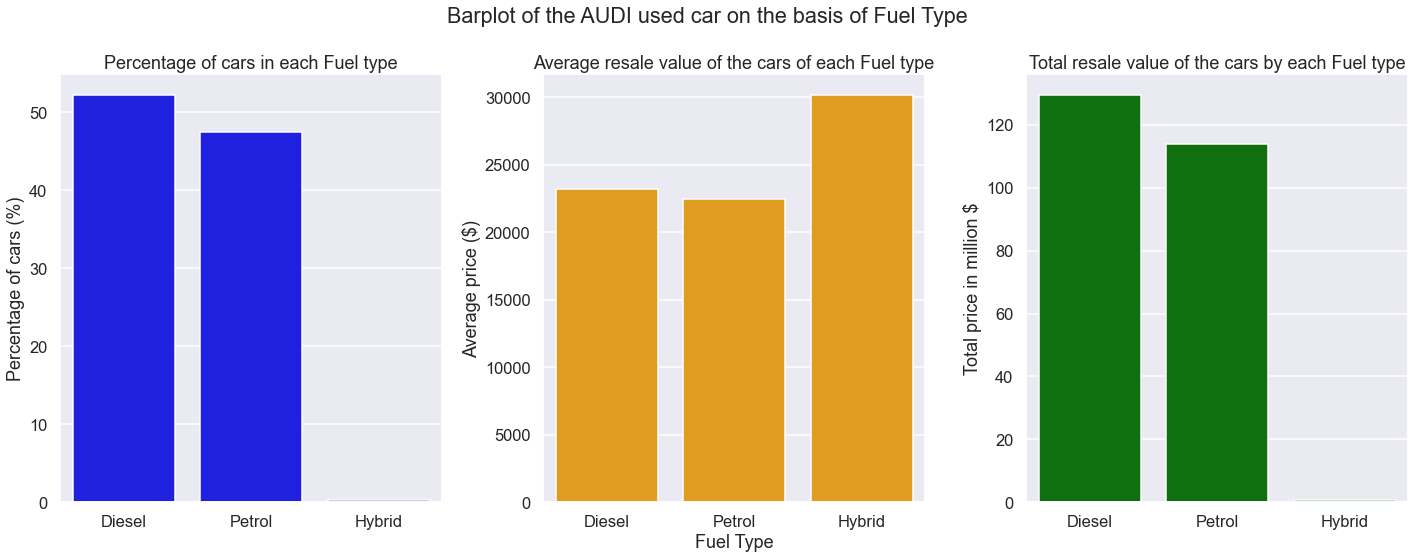

In [94]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x=df_agg_fuelType.index, y='percent_of_cars', data=df_agg_fuelType,color='blue')
plt.title("Percentage of cars in each Fuel type")
plt.ylabel("Percentage of cars (%)")
plt.xlabel("")


plt.subplot(1, 3, 2)
sns.barplot(x=df_agg_fuelType.index, y='mean', data=df_agg_fuelType, color='orange')
plt.title("Average resale value of the cars of each Fuel type")
plt.ylabel("Average price ($)")
plt.xlabel("Fuel Type")


plt.subplot(1, 3, 3)
sns.barplot(x=df_agg_fuelType.index, y='sum', data=df_agg_fuelType, color='green')
plt.title("Total resale value of the cars by each Fuel type")
plt.ylabel("Total price in million $")
plt.xlabel("")


plt.suptitle("Barplot of the AUDI used car on the basis of Fuel Type")
plt.tight_layout()
plt.show()

####  We can see that most sold cars are diesel type, then petrol and lastly hybrid, besides we can see the average reselling price of Hybrid cars is the highest. And total sale price of the Diesel cars is greater than the the other two.